In [1]:
#!/usr/bin/python
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the senators' names, parties, and voting records.
vote_matrix = np.loadtxt('vote_matrix.txt')
senators = [line.strip() for line in open('senators.txt').readlines()]
parties = [line.strip() for line in open('parties.txt').readlines()]
measures = [line.strip() for line in open('measures.txt').readlines()]
print senators[13]
print measures[37]
print vote_matrix[13][37]

Bunning (R-KY)
To authorize appropriations for necessary or appropriate travel, subsistence, and related expenses, and for other purposes.
1.0


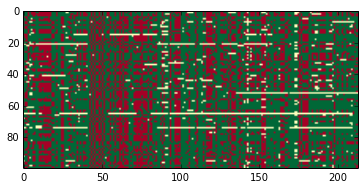

In [5]:
# Let's visualize the matrix directly.
plt.imshow(vote_matrix, cmap='RdYlGn')
plt.show()

Session has 49 Democrats, 49 Republicans, and 2 Independents


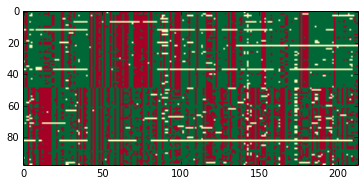

In [6]:
# There's quite the block structure there -- what if we re-arrange it by party?
dem_index = [i for i in range(len(parties)) if parties[i] == 'D']
rep_index = [i for i in range(len(parties)) if parties[i] == 'R']
ind_index = [i for i in range(len(parties)) if parties[i] == 'I']
print 'Session has %d Democrats, %d Republicans, and %d Independents' % \
      (len(dem_index), len(rep_index), len(ind_index))
plt.imshow(np.concatenate((vote_matrix[dem_index,:], vote_matrix[rep_index,:]), 0), cmap='RdYlGn')
plt.show()

In [7]:
# Pull in seaborn now...
import seaborn as sns
sns.set_style("white")

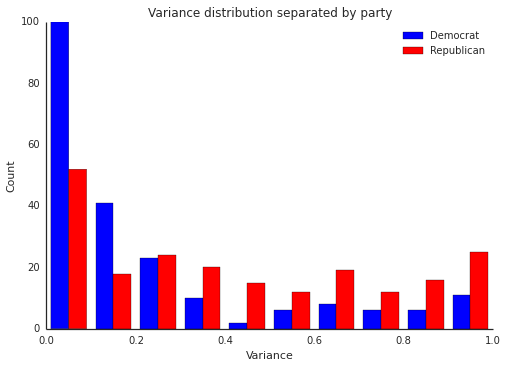

In [8]:
# Let's take a look at the variance within each party.
fig = plt.figure()
ax = fig.add_subplot(111)
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)
plt.hist([dem_vote_var, rep_vote_var], 10,
         color=['blue', 'red'], label=['Democrat', 'Republican'])
plt.legend()
plt.title('Variance distribution separated by party')
plt.ylabel('Count')
plt.xlabel('Variance')
sns.despine()
plt.show()

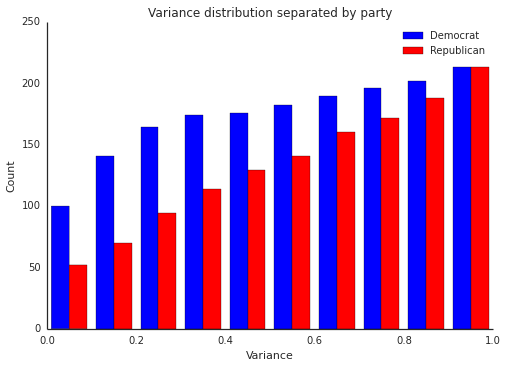

In [9]:
# Let's try with a cumulative histogram instead.
fig = plt.figure()
ax = fig.add_subplot(111)
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)
plt.hist([dem_vote_var, rep_vote_var], 10,
         cumulative=True,
         color=['blue', 'red'], label=['Democrat', 'Republican'])
sns.despine()
plt.legend()
plt.title('Variance distribution separated by party')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

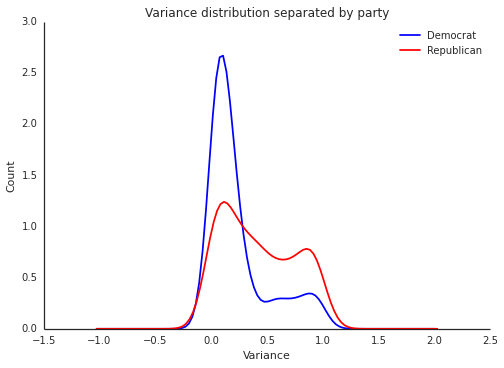

In [10]:
# Or with two KDE plots
fig = plt.figure()
ax = fig.add_subplot(111)
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)
sns.kdeplot(dem_vote_var, color='blue', label='Democrat')
sns.kdeplot(rep_vote_var, color='red', label='Republican')
sns.despine()
plt.legend()
plt.title('Variance distribution separated by party')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

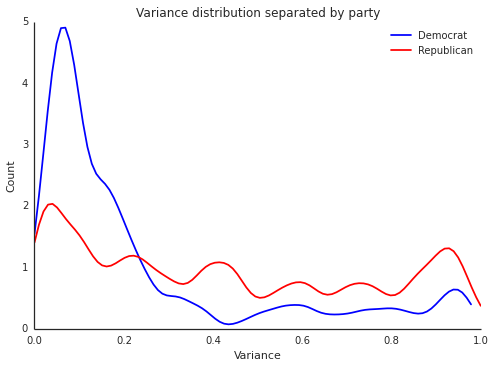

In [11]:
# Hmm ... negative variance you say? Let's add a cut parameter.
fig = plt.figure()
ax = fig.add_subplot(111)
dem_vote_var = np.var(vote_matrix[dem_index,:],0)
rep_vote_var = np.var(vote_matrix[rep_index,:],0)
sns.kdeplot(dem_vote_var, color='blue', label='Democrat', cut=0, bw=0.1)
sns.kdeplot(rep_vote_var, color='red', label='Republican', cut=0, bw=0.1)
sns.despine()
plt.legend()
plt.title('Variance distribution separated by party')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()

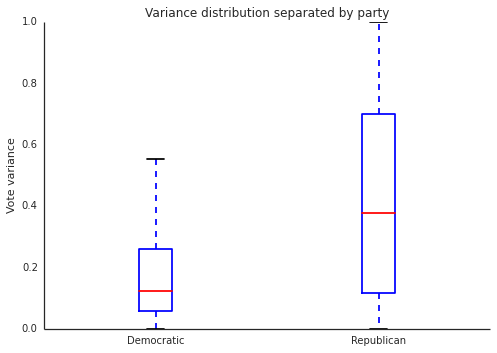

In [13]:
# Or with a box plot.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([dem_vote_var, rep_vote_var])
sns.despine()
ax.set_xticklabels(['Democratic', 'Republican'])
plt.title('Variance distribution separated by party')
plt.ylabel('Vote variance')
plt.show()

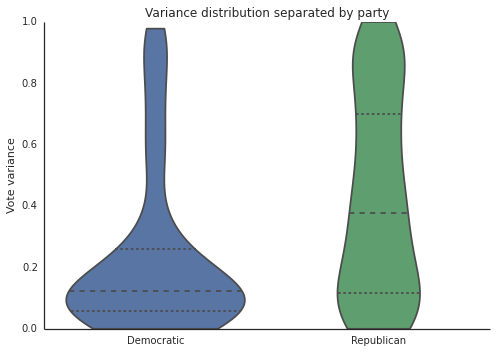

In [14]:
# Or with a violin plot.
fig = plt.figure()
ax = fig.add_subplot(111)
sns.violinplot(data=[dem_vote_var, rep_vote_var], inner='quartile', cut=0)
sns.despine()
ax.set_xticklabels(['Democratic', 'Republican'])
plt.title('Variance distribution separated by party')
plt.ylabel('Vote variance')
plt.show()

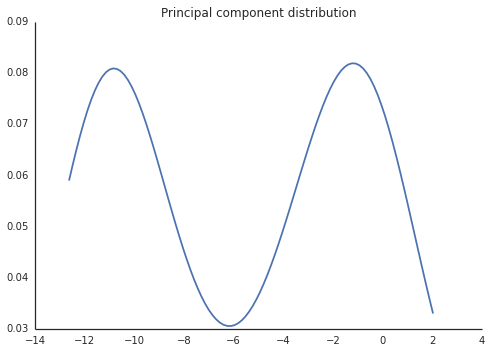

In [15]:
# Let's check out the distribution of the first principal component.
svd_u, svd_s, svd_v = np.linalg.svd(vote_matrix)
pc1 = np.squeeze(np.asarray(svd_v[1,:]))
senators_pc1 = np.squeeze(np.asarray(np.dot(vote_matrix, pc1)))
sns.kdeplot(senators_pc1, cut=0)
sns.despine()
plt.title('Principal component distribution')
plt.show()

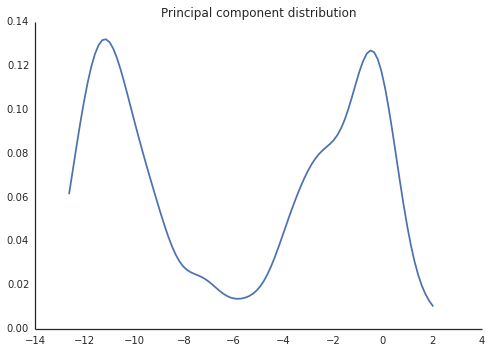

In [16]:
# That looks suspiciously smooth ... is this an instance of the bw parameter
# using a kernel that's too big? Yes.
sns.kdeplot(senators_pc1, bw=0.15, cut=0)
sns.despine()
plt.title('Principal component distribution')
plt.show()

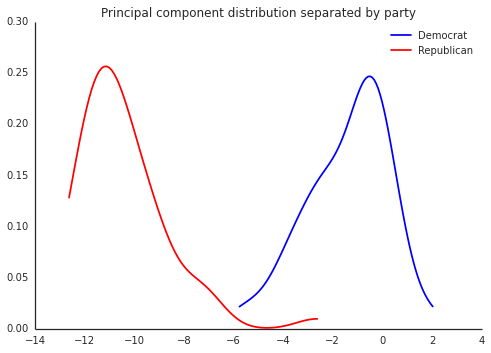

In [17]:
# Now that it's looking more reasonable, let's break down by party (the obvious
# choice for bimodality)
sns.kdeplot(senators_pc1[dem_index], color='blue', label='Democrat', cut=0)
sns.kdeplot(senators_pc1[rep_index], color='red', label='Republican', cut=0)
sns.despine()
plt.title('Principal component distribution separated by party')
plt.legend()
plt.show()

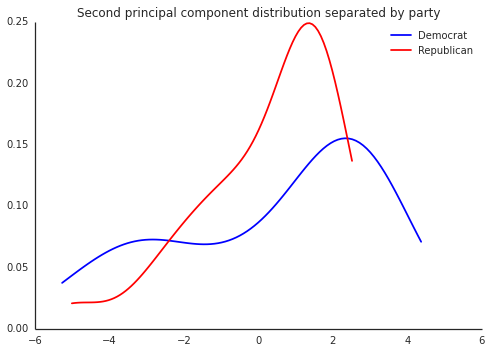

In [18]:
# That's definitely the first principal component. What does the second principal component 
# look like, with the same breakdown?
pc2 = np.squeeze(np.asarray(svd_v[2,:]))
senators_pc2 = np.squeeze(np.asarray(np.dot(vote_matrix, pc2)))
sns.kdeplot(senators_pc2[dem_index], color='blue', label='Democrat', cut=0)
sns.kdeplot(senators_pc2[rep_index], color='red', label='Republican', cut=0)
sns.despine()
plt.title('Second principal component distribution separated by party')
plt.legend()
plt.show()

In [ ]:
# To drive home the point about box plots versus violin plots and expressiveness, let's
# compare principal components 1 and 2.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([senators_pc1, senators_pc2])
sns.despine()
ax.set_xticklabels(['Principal 1', 'Principal 2'])
plt.title('Principal component value distributions')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
sns.violinplot(data=[senators_pc1, senators_pc2], inner='quartile', cut=0)
sns.despine()
ax.set_xticklabels(['Principal 1', 'Principal 2'])
plt.title('Principal component value distributions')
plt.show()

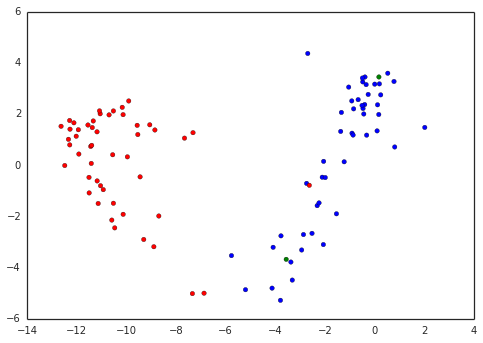

In [19]:
# What does this look like in 2D?
plt.scatter(senators_pc1[dem_index], senators_pc2[dem_index], c='blue')
plt.scatter(senators_pc1[rep_index], senators_pc2[rep_index], c='red')
plt.scatter(senators_pc1[ind_index], senators_pc2[ind_index], c='green')
plt.show()

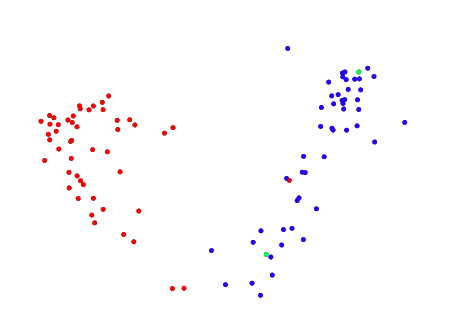

In [20]:
# But ... remember that discussion about non-data ink?
# And color doesn't look great ... 
# http://matplotlib.org/users/colormaps.html
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(senators_pc1[dem_index], senators_pc2[dem_index], c='blue')
plt.scatter(senators_pc1[rep_index], senators_pc2[rep_index], c='red')
plt.scatter(senators_pc1[ind_index], senators_pc2[ind_index], c='green')
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
def PartyColorHSV(party):
  if party  == 'R':
    return 0
  if party == 'D':
    return 0.7
  if party == 'I':
    return 0.4
senators_c = [PartyColorHSV(party) for party in parties]
ax.scatter(senators_pc1, senators_pc2, c=senators_c,
           cmap='hsv',
           norm=matplotlib.colors.Normalize(vmin=0, vmax=1),
           edgecolors='none')
plt.show()

In [ ]:
# Now, let's get to interactivity